In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
!ls

Graph.ipynb  personal_loan_17.csv  personal_loan_18.csv  personal_loan_19.csv


In [37]:
pl17=pd.read_csv("./personal_loan_17.csv")
pl18=pd.read_csv("./personal_loan_18.csv")
pl19=pd.read_csv("./personal_loan_19.csv")
pl17.columns

Index(['Week', 'personal loan: (India)'], dtype='object')

In [2]:
sns.set(font_scale=1.25)
plt.figure(figsize=(15,10))
pl17['week_no'] = [i for i in range(pl17.shape[0])]
pl18['week_no'] = [i for i in range(pl18.shape[0])]
pl19['week_no'] = [i for i in range(pl19.shape[0])]
g = sns.lineplot(data=pl17,x='week_no',y='personal loan: (India)',color="g")
g = sns.lineplot(data=pl18,x='week_no',y='personal loan: (India)',color="b")
g = sns.lineplot(data=pl19,x='week_no',y='personal loan: (India)',color="r")

# Final Code Start Running from below

In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

In [2]:
keywords = ['Personal Loan','Education Loan','Home Loan','Business Loan','Car Loan','Salary Account','Savings Account','Current Account','Credit Cards','Forex Card','Home Insurance','Life Insurance','Vehicle Insurance','Travel Insurance']
timeframe = ['2017-01-01 2017-12-31','2018-01-01 2018-12-31','2019-01-01 2019-12-31']
pytrends = TrendReq(hl='en-US', tz=360)
data = {}
for i in keywords:
    temp={}
    for j in timeframe:
        pytrends.build_payload(
                 kw_list=[i],
                 cat=0,
                 timeframe=j,
                 geo='IN',
                 gprop='')
        temp[j.split('-')[0]]=pytrends.interest_over_time()
        temp[j.split('-')[0]]['week_no']=[k for k in range(temp[j.split('-')[0]].shape[0])]
    data[i]=temp

In [3]:
data['Education Loan']['2017'].columns[0]

'Education Loan'

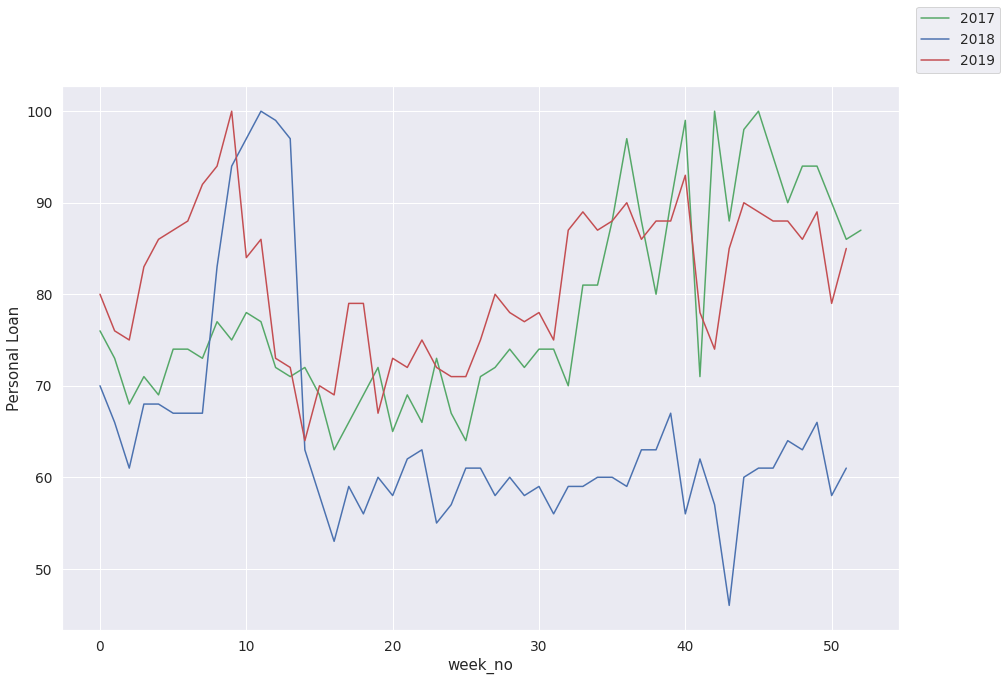

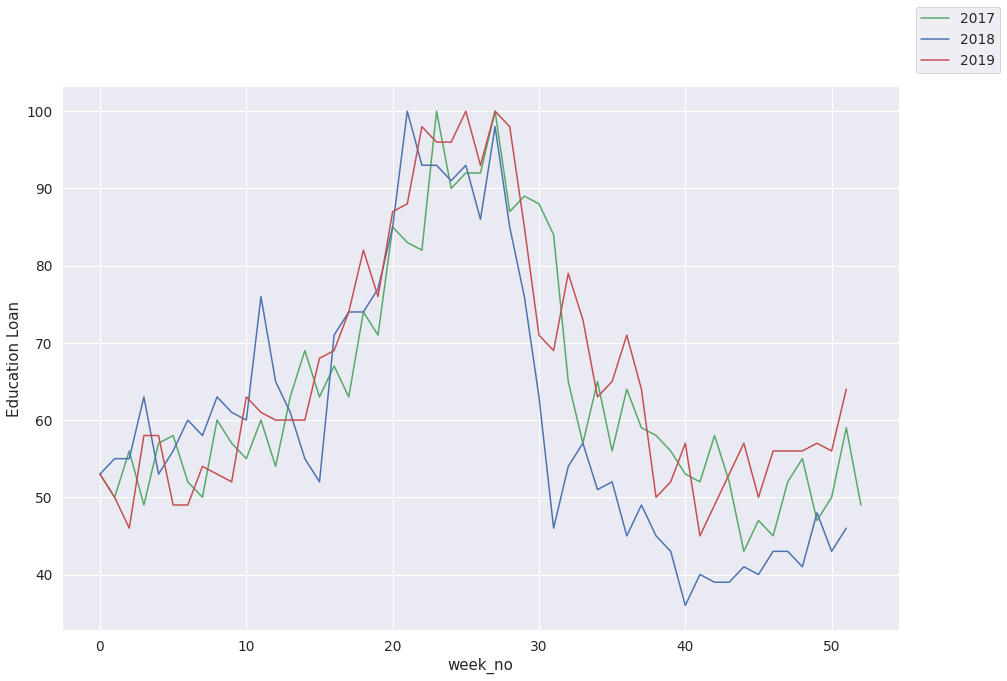

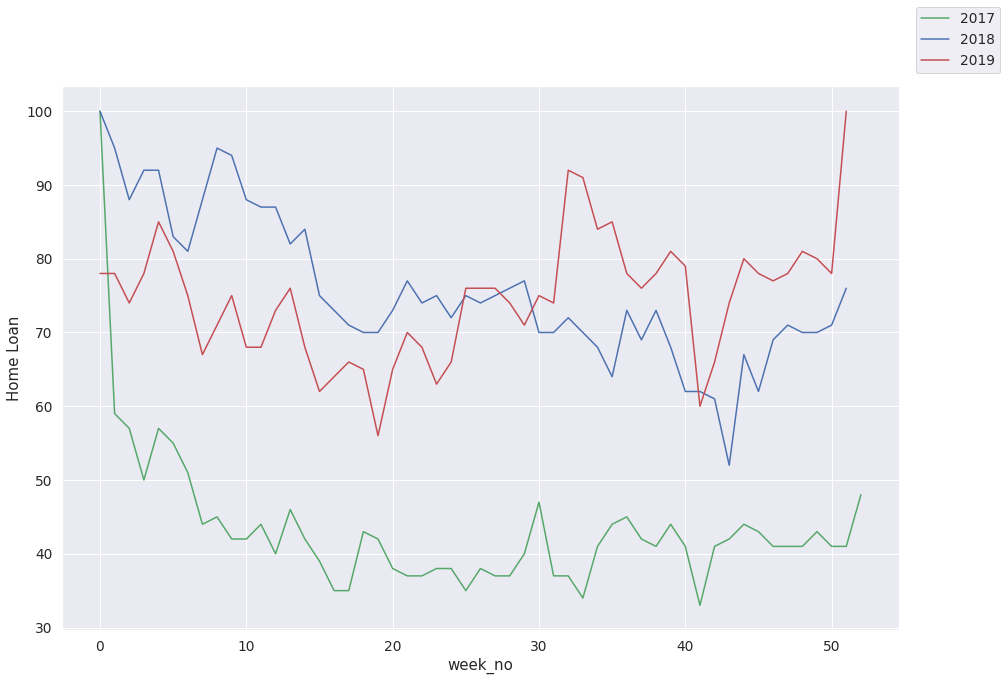

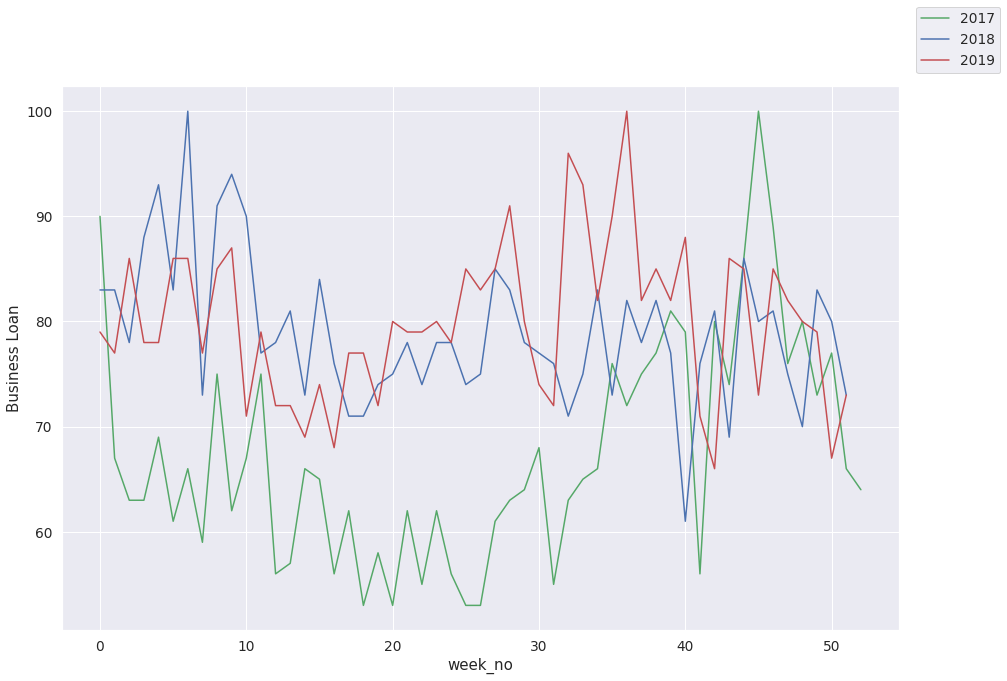

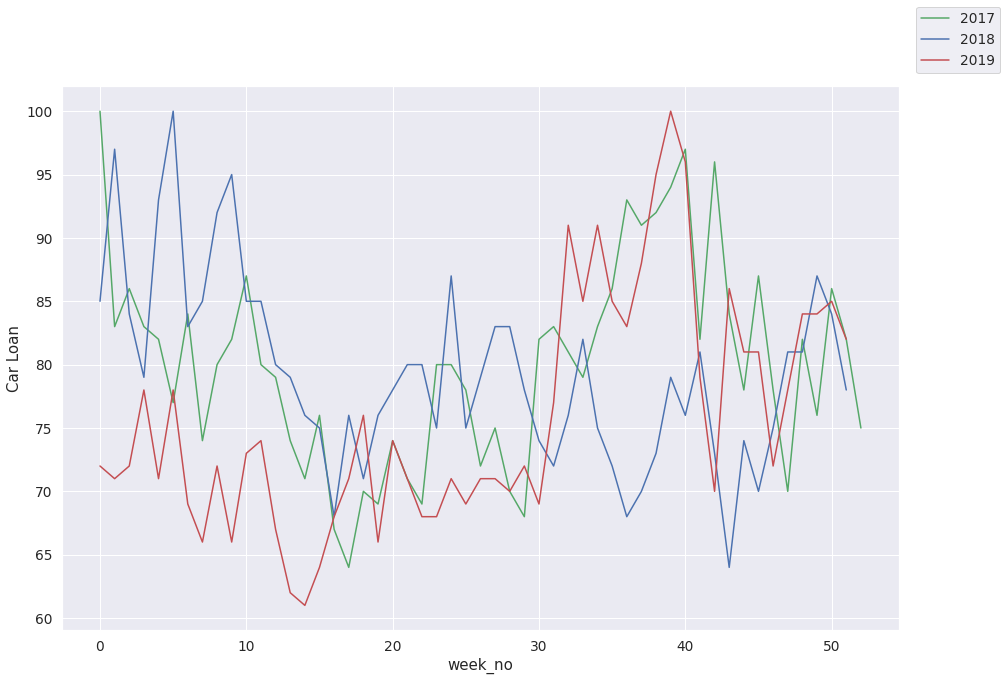

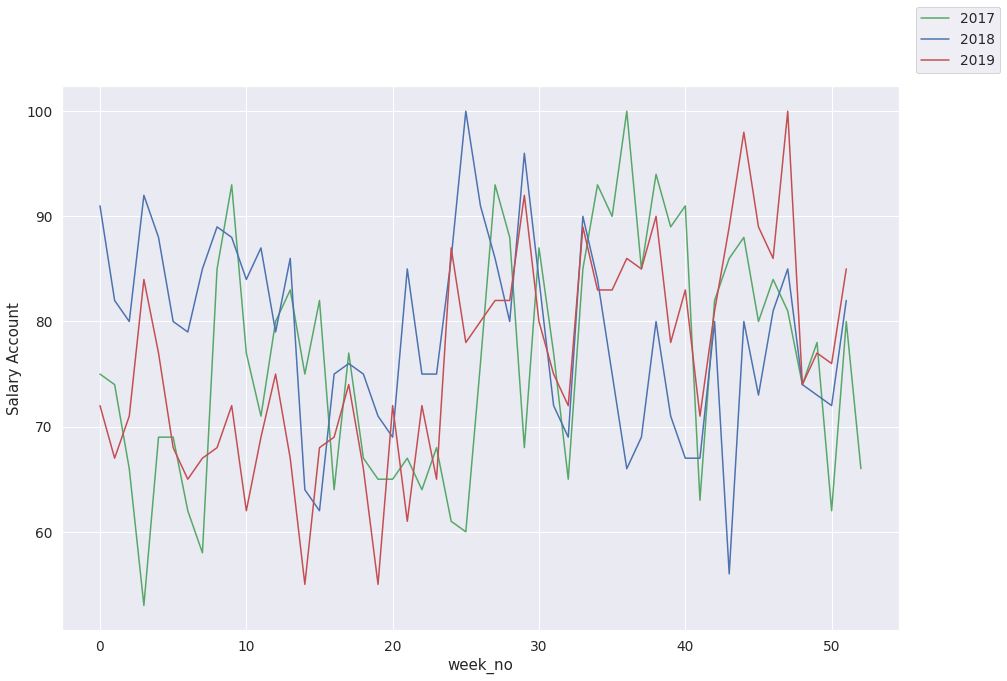

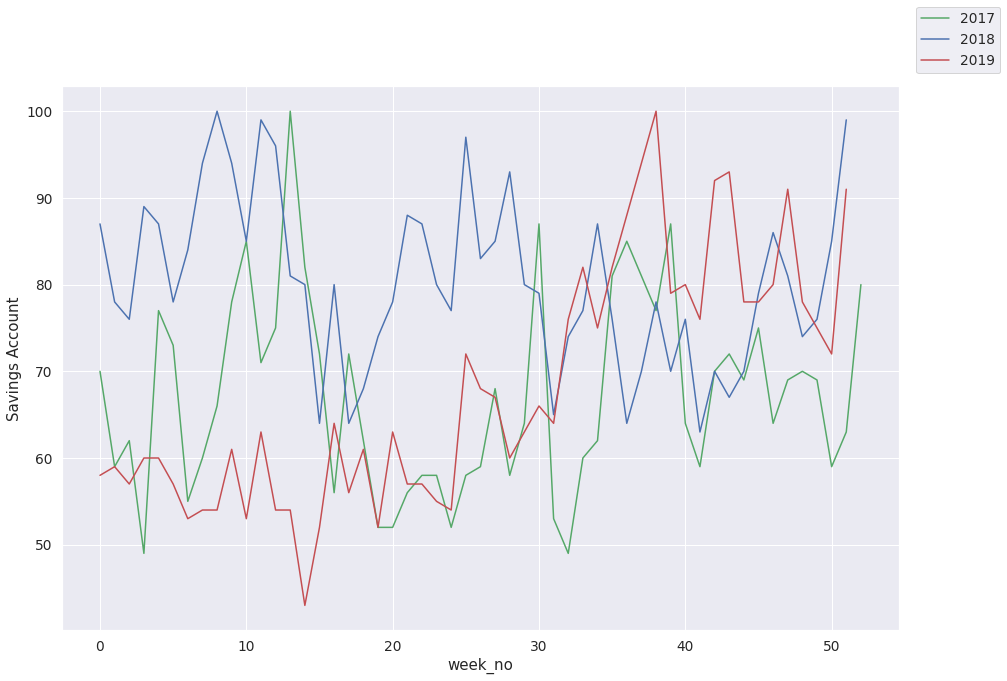

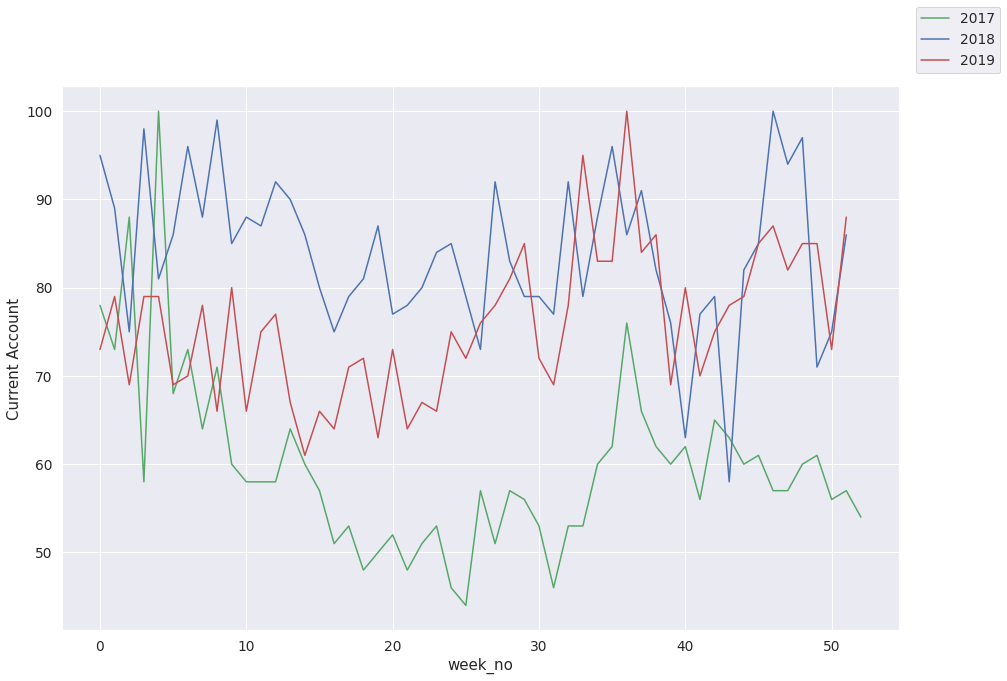

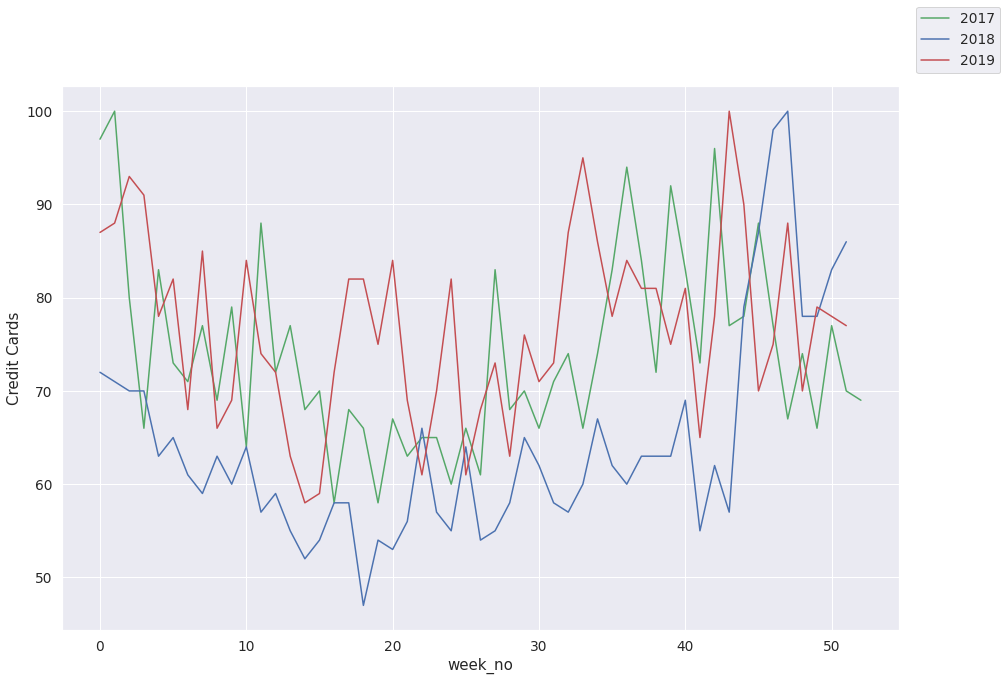

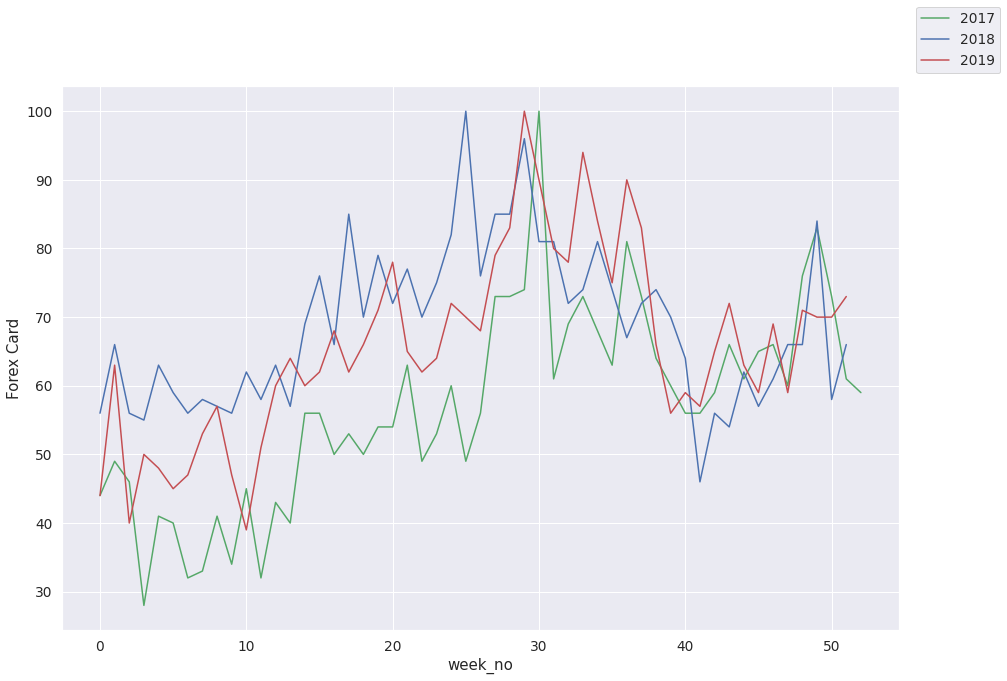

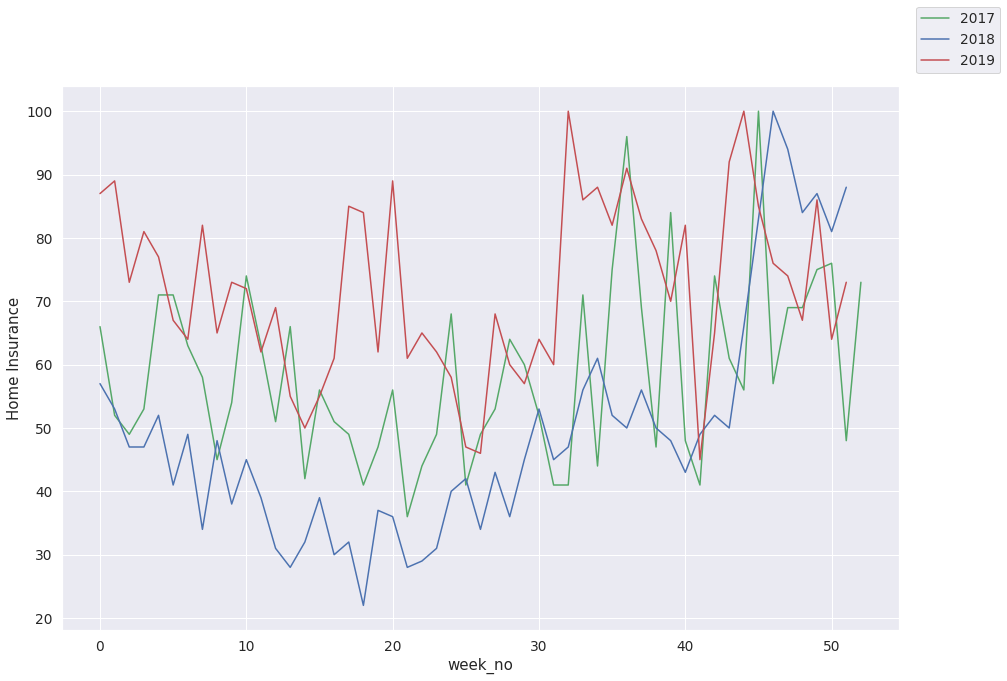

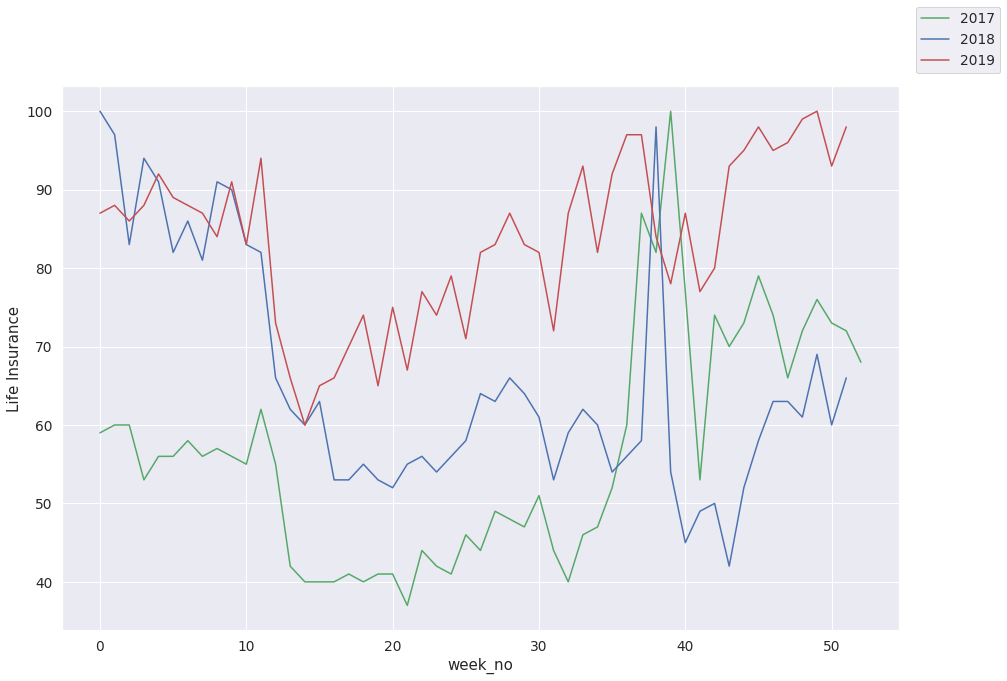

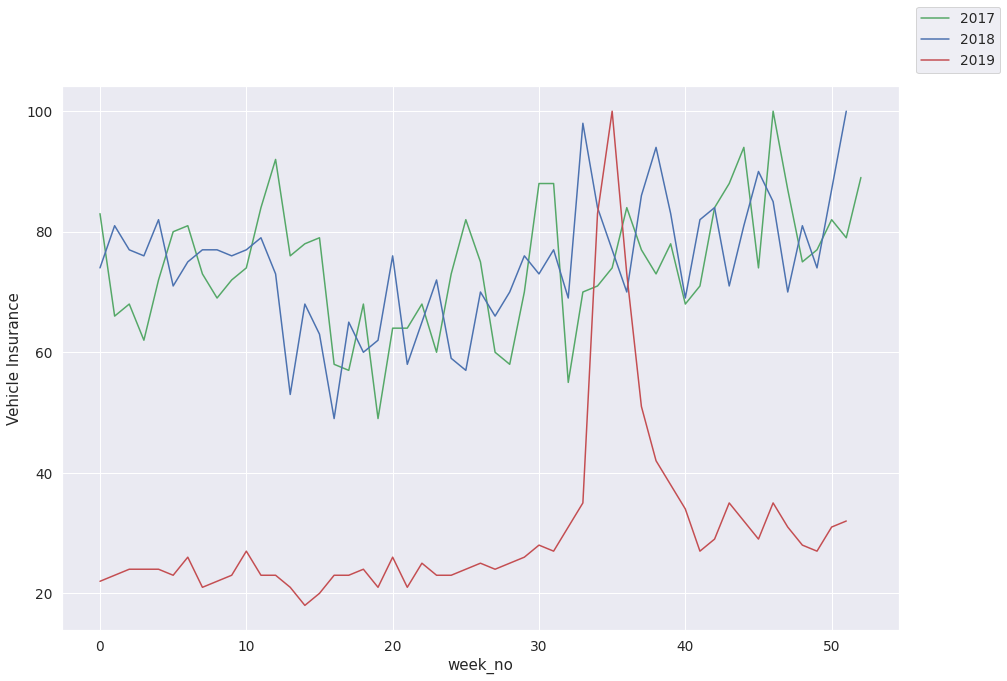

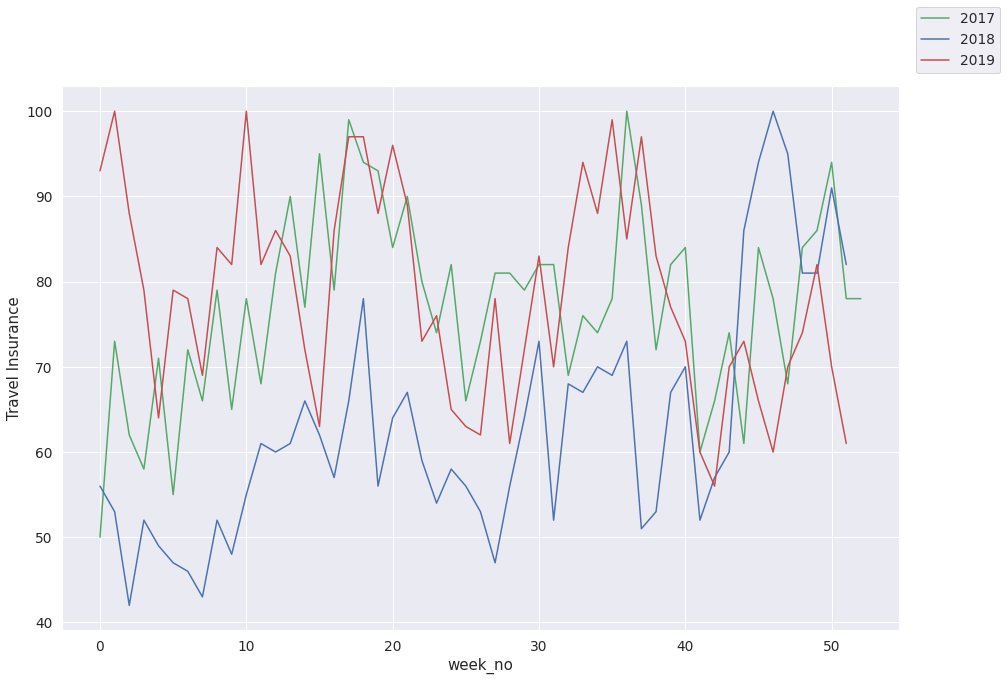

In [5]:
years = ['2017','2018','2019']
for i in keywords:
    sns.set(font_scale=1.25)
    f = plt.figure(figsize=(15,10))
    g = sns.lineplot(data=data[i]['2017'],x='week_no',y=data[i]['2017'].columns[0],color="g")
    g = sns.lineplot(data=data[i]['2018'],x='week_no',y=data[i]['2017'].columns[0],color="b")
    g = sns.lineplot(data=data[i]['2019'],x='week_no',y=data[i]['2017'].columns[0],color="r")
    f.legend(labels=['2017','2018','2019'])
    fig = g.get_figure()
    fig.savefig("./graphs/"+i+".png")